**STEP-1**

In [6]:
import pandas as pd
import json


with open('/content/DataEngineeringQ2.json') as dt:
    dj = json.load(dt)


appointments = []
for i in dj:
    patient_details = i['patientDetails']
    gender = patient_details.get('gender', None)
    gender_transformed = 'male' if gender == 'M' else 'female' if gender == 'F' else 'others'
    DOB = patient_details.get('birthDate',None)
    
    appointment = {
        'appointmentId': i['_id'],
        'phoneNumber': i['phoneNumber'],
        'firstName': patient_details['firstName'],
        'lastName': patient_details['lastName'],
        'gender': gender_transformed,
        'DOB': patient_details.get('birthDate', None),
        'medicines': i['consultationData']['medicines']
    }
    appointments.append(appointment)


df = pd.DataFrame(appointments)


print(df)

   appointmentId     phoneNumber                 firstName     lastName  \
0       T6hf3rb5     96686896670                       Css                
1       T65g3rb5      9496368916                    Lokesh                
2       T7g6Srb5      7787204833                     Shila          Das   
3       94bg8W8d      9376756879                   Bhavika  Ben Panchal   
4       T6h8H56c      5267384241                Raghu Viju                
5        T9Jh8c8   +919826374025              Dinesh Kumar                
6       9Is624b9      7587265252                     Lalit     Sankhwal   
7       T8H9c3c6      5586958767                      Ravi                
8        T8Ud380      9987602525                    Dinesh                
9        T345fG4      9234354366                    Sanjay                
10      T4F6a175      4863281056                    Akshay       Akshay   
11       TW3r002      8687986800                   Nirmala                
12       6U6Ra36         

**STEP-2**

In [7]:
import pandas as pd
import json
from datetime import datetime
import hashlib


with open('/content/DataEngineeringQ2.json') as dt:
    data = json.load(dt)


def calculate_age(dob):
    if dob is None:
        return None
    today = datetime.now()
    birth_date = datetime.strptime(dob, '%Y-%m-%dT%H:%M:%S.%fZ')
    age = today.year - birth_date.year
    if today.month < birth_date.month or (today.month == birth_date.month and today.day < birth_date.day):
        age -= 1
    return age


def is_valid_mobile(phone_number):
    if phone_number.startswith('+91') or phone_number.startswith('91'):
        number = phone_number[-10:]  # Extract the last 10 digits
        if number.isnumeric() and 6000000000 <= int(number) <= 9999999999:
            return True
    return False


def generate_hash(phone_number):
    return hashlib.sha256(phone_number.encode()).hexdigest()


appointments = []
for record in data:
    patient_details = record['patientDetails']
    gender = patient_details.get('gender', None)
    gender_transformed = 'male' if gender == 'M' else 'female' if gender == 'F' else 'others'
    
    fullName = patient_details['firstName'] + ' ' + patient_details['lastName']
    phoneNumber = record['phoneNumber']
    
    isValidMobile = is_valid_mobile(phoneNumber)
    phoneNumberHash = generate_hash(phoneNumber) if isValidMobile else None
    
    age = calculate_age(patient_details.get('birthDate', None))
    
    medicines = record['consultationData']['medicines']
    noOfMedicines = len(medicines)
    noOfActiveMedicines = sum(1 for med in medicines if med['isActive'])
    noOfInactiveMedicines = noOfMedicines - noOfActiveMedicines
    
    activeMedicineNames = ", ".join(med['medicineName'] for med in medicines if med['isActive'])
    
    appointment = {
        'appointmentId': record['appointmentId'],
        'fullName': fullName,
        'phoneNumber': phoneNumber,
        'isValidMobile': isValidMobile,
        'phoneNumberHash': phoneNumberHash,
        'gender': gender_transformed,
        'DOB': patient_details.get('birthDate', None),
        'Age': age,
        'noOfMedicines': noOfMedicines,
        'noOfActiveMedicines': noOfActiveMedicines,
        'noOfInActiveMedicines': noOfInactiveMedicines,
        'MedicineNames': activeMedicineNames
    }
    appointments.append(appointment)


df = pd.DataFrame(appointments)

columns = [
    'appointmentId',
    'fullName',
    'phoneNumber',
    'isValidMobile',
    'phoneNumberHash',
    'gender',
    'DOB',
    'Age',
    'noOfMedicines',
    'noOfActiveMedicines',
    'noOfInActiveMedicines',
    'MedicineNames'
]


df = df[columns]


df.to_json('otpt.json')
df.to_csv('otpt.csv')

**STEP-3**

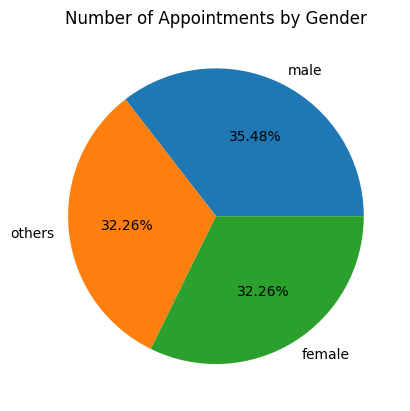

In [9]:
import json
import matplotlib.pyplot as plt

ag_data = {
    'Age': df['Age'].mean(),
    'gender': df['gender'].value_counts().to_dict(),
    'validPhoneNumbers': df['isValidMobile'].sum(),
    'appointments': len(df),
    'medicines': df['noOfMedicines'].sum(),
    'activeMedicines': df['noOfActiveMedicines'].sum()
}


ag_data['Age'] = int(ag_data['Age'])
ag_data['validPhoneNumbers'] = int(ag_data['validPhoneNumbers'])
ag_data['appointments'] = int(ag_data['appointments'])
ag_data['medicines'] = int(ag_data['medicines'])
ag_data['activeMedicines'] = int(ag_data['activeMedicines'])


with open('aggregated_data.json', 'w') as f:
    json.dump(ag_data, f, indent=4)

#plot
gender_counts = df['gender'].value_counts()
labels = gender_counts.index
values = gender_counts.values

plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title('Number of Appointments by Gender')
plt.show()